# SIR-Modell

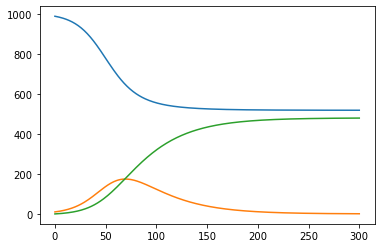

In [3]:
from lib.iteration import *

a = 0.0002; b = 0.1; c = 0.03

l = iteration(sir_modell, x0=[990, 10, 0], n=300, a=a, b=b, c=c)

plot_iteration(l)